<a href="https://colab.research.google.com/github/ashuu-05/Stoke_prediction/blob/main/Stroke_prediction_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing Required Libraries

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
# Upload the dataset (Google Colab)
from google.colab import files
uploaded = files.upload()




Saving healthcare-dataset-stroke-data (1).csv to healthcare-dataset-stroke-data (1).csv


#Loading the dataset

In [ ]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv("healthcare-dataset-stroke-data (1).csv")

#Exploratory Data Analysis

In [ ]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())






First few rows of the dataset:
      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


In [ ]:
# Summary statistics of the dataset
print("\nSummary statistics of the dataset:")
print(df.describe())


Summary statistics of the dataset:
                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%    

In [ ]:
# Data types and check for missing values
print("\nData types and missing values:")
print(df.info())


Data types and missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


<ipython-input-8-8047b8438301>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='stroke', data=df, palette='Set2')


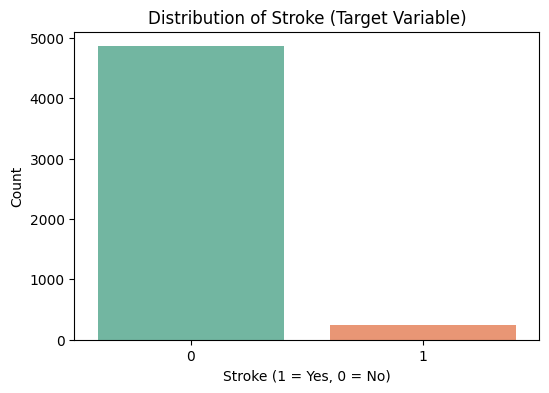

In [ ]:
# Plot the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='stroke', data=df, palette='Set2')
plt.title("Distribution of Stroke (Target Variable)")
plt.xlabel("Stroke (1 = Yes, 0 = No)")
plt.ylabel("Count")
plt.show()


#Interpretation
The countplot shows that the vast majority of 5,110 records—roughly 95%—are no-stroke cases (stroke = 0), while only about 5% are stroke cases (stroke = 1). In concrete terms, we have on the order of 4,900 non-stroke patients and only 250 stroke patients.

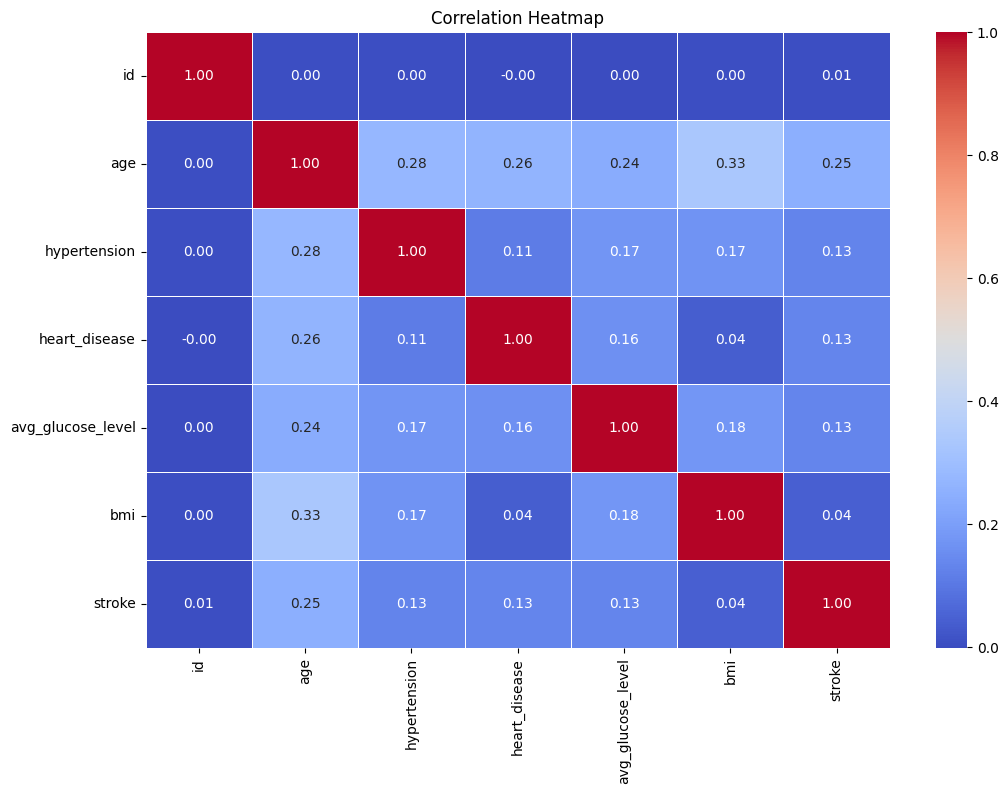

In [ ]:
# Compute the correlation matrix
# Calculate correlation only for numeric columns
correlation_matrix = df.corr(numeric_only=True)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


#Interpretation
All of the numeric predictors show only weak-to-moderate linear relationships with each other and with stroke.  The key take-aways are:

Age is most strongly correlated with stroke (≈ 0.25), and also with BMI (0.33) and glucose (0.24).
Hypertension, heart disease, and glucose level each have small positive correlations with stroke (≈ 0.11-0.17).
BMI is essentially uncorrelated with stroke (≈ 0.04).
No pair of features exceeds about 0.35 in absolute correlation, so there is little multicollinearity.

In short, age is the strongest linear predictor of stroke risk.


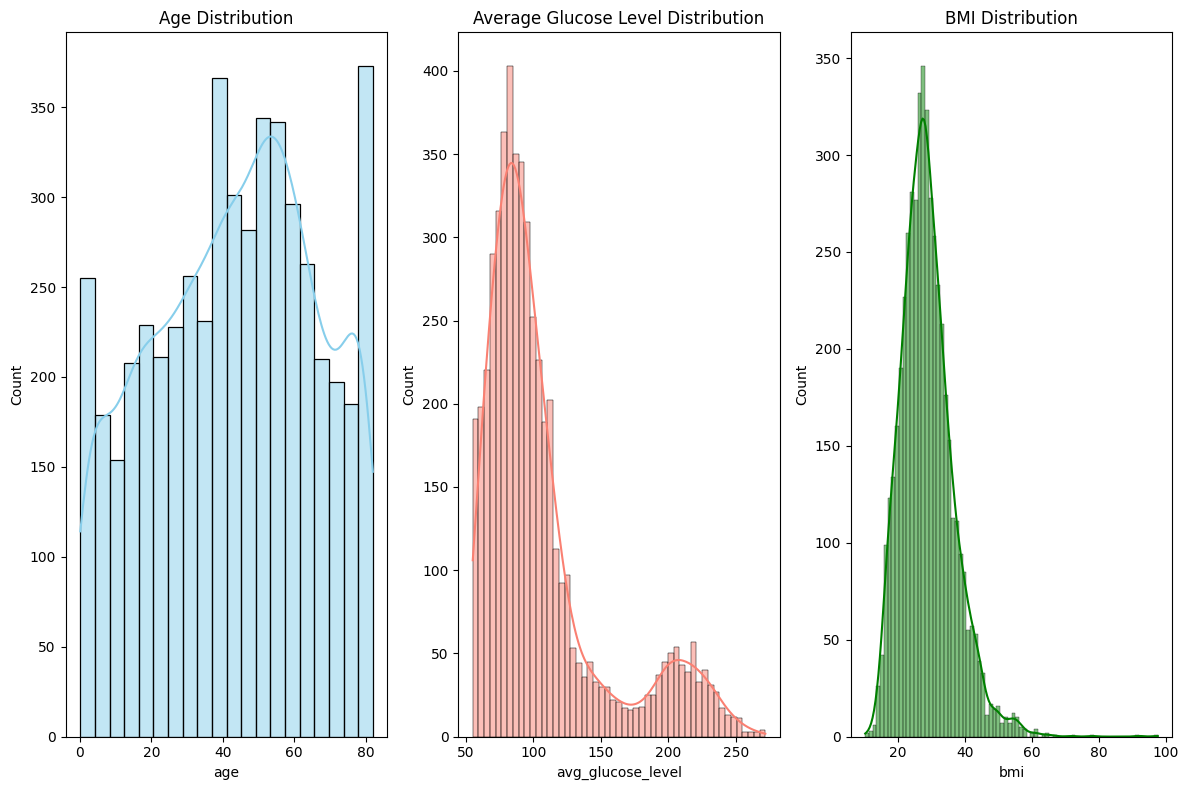

In [ ]:
# Distribution of numerical features
plt.figure(figsize=(12, 8))

# Age distribution
plt.subplot(1, 3, 1)
sns.histplot(df['age'], kde=True, color='skyblue')
plt.title('Age Distribution')

# Average glucose level distribution
plt.subplot(1, 3, 2)
sns.histplot(df['avg_glucose_level'], kde=True, color='salmon')
plt.title('Average Glucose Level Distribution')

# BMI distribution
plt.subplot(1, 3, 3)
sns.histplot(df['bmi'], kde=True, color='green')
plt.title('BMI Distribution')

plt.tight_layout()
plt.show()


#Interpretation
Age Distribution
Covers the full lifespan but is concentrated in adulthood—few very young or very old. A noticeable hump around ages 40-60, reflecting that most participants are middle-aged to early seniors.

Average Glucose Level
Right-skewed: the bulk of values sit between 70-120 mg/dL, but there is a tail (and minor second bump) out beyond 180-250 mg/dL, indicating a subset with unusually high glucose.

BMI Distribution
Peaks in the 25-35 range (overweight/obese), with a long right tail stretching past 60, showing some extreme outliers.
Overall, more people clustered in the overweight category than in normal BMI.


<ipython-input-11-dde0b33e4dff>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df, palette='Set1')
<ipython-input-11-dde0b33e4dff>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hypertension', data=df, palette='Set1')
<ipython-input-11-dde0b33e4dff>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='heart_disease', data=df, palette='Set1')
<ipython-input-11-dde0b33e4dff>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue

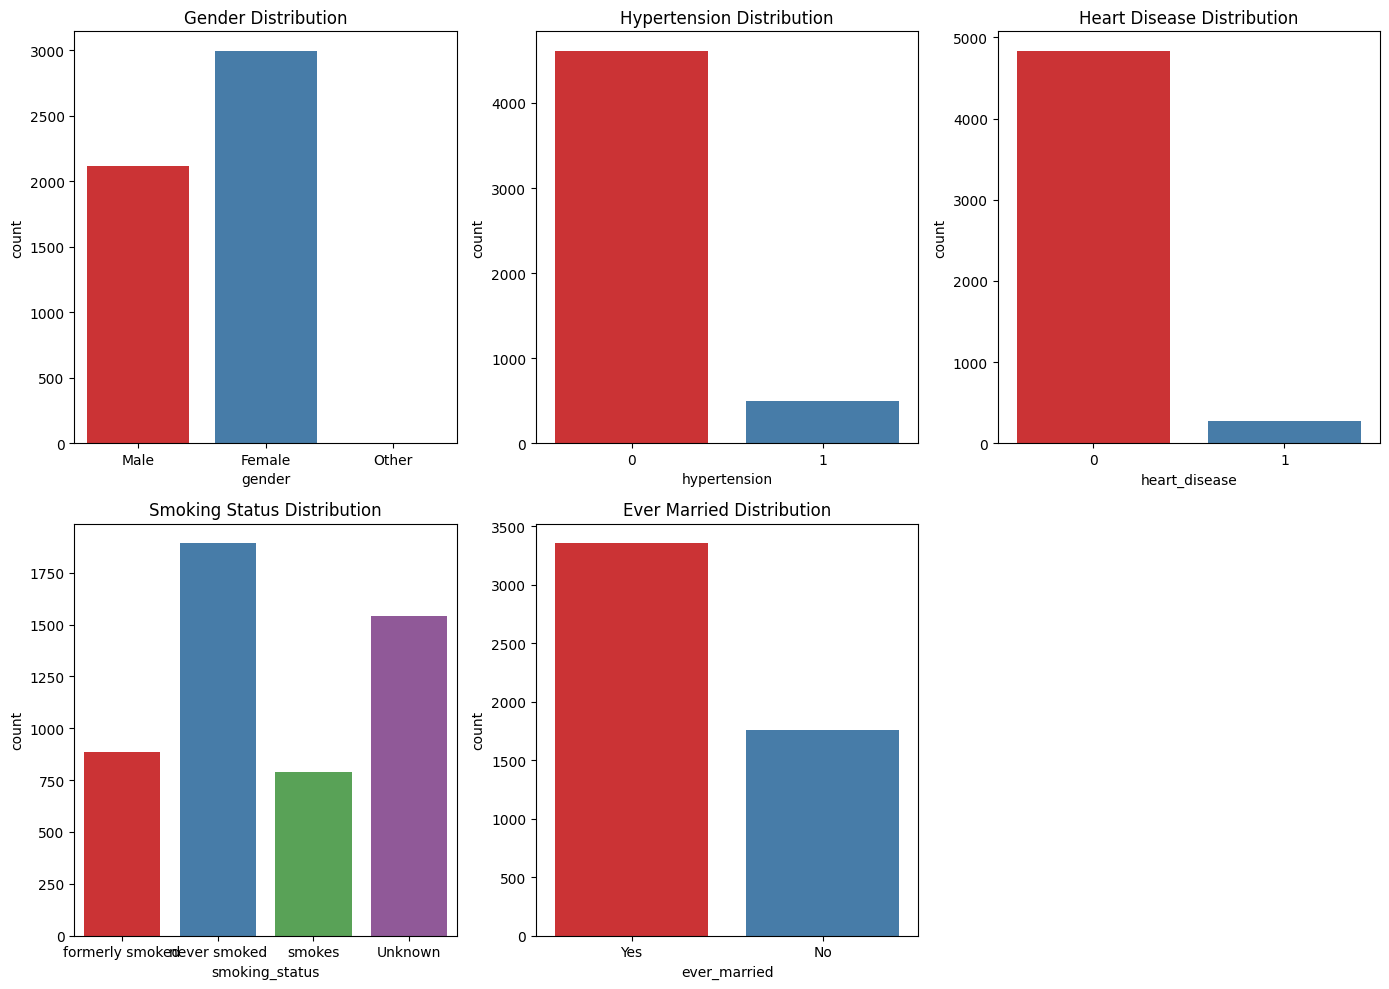

In [ ]:
# Visualize the distribution of categorical features
plt.figure(figsize=(14, 10))

# Gender distribution
plt.subplot(2, 3, 1)
sns.countplot(x='gender', data=df, palette='Set1')
plt.title('Gender Distribution')

# Hypertension distribution
plt.subplot(2, 3, 2)
sns.countplot(x='hypertension', data=df, palette='Set1')
plt.title('Hypertension Distribution')

# Heart disease distribution
plt.subplot(2, 3, 3)
sns.countplot(x='heart_disease', data=df, palette='Set1')
plt.title('Heart Disease Distribution')

# Smoking status distribution
plt.subplot(2, 3, 4)
sns.countplot(x='smoking_status', data=df, palette='Set1')
plt.title('Smoking Status Distribution')

# Ever married distribution
plt.subplot(2, 3, 5)
sns.countplot(x='ever_married', data=df, palette='Set1')
plt.title('Ever Married Distribution')

plt.tight_layout()
plt.show()


#Interpretation
Gender
60% female (3,000), 40% male (2,100), almost no “Other” entries.
Hypertension
90% have no hypertension (4,500), 10% have hypertension (500).
Heart Disease
94% have no heart disease (4,800), 6% have heart disease (300).

All three categorical features are heavily imbalanced, with the “yes”/minority classes (hypertension, heart disease) comprising only single-digit percentages—just like the stroke outcome itself.

Smoking Status
The largest group is never smoked (1,900), followed by Unknown (1,550).
Former smokers (900) and current smokers (800) are much smaller.
The big Unknown category suggests heavy missingness or non-reporting in smoking data.

Ever Married
About 65% have ever been married (3,400), while 35% have not (1,800).

Both features are skewed—especially smoking status, where nearly a third of values are “Unknown”—which you may need to address before modeling.



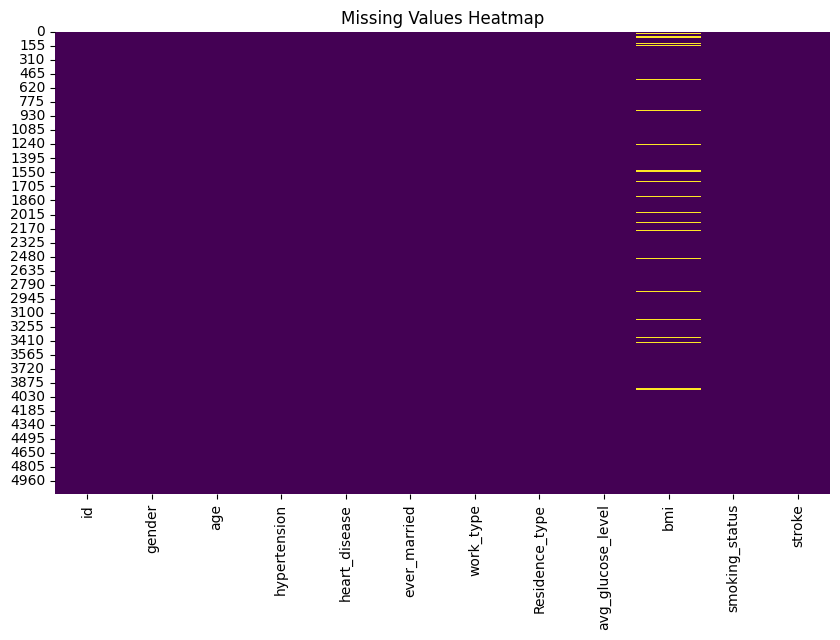

Missing values per column:
id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [ ]:
# Check for missing values
missing_values = df.isnull().sum()

# Plot missing values heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

# Display missing values count
print("Missing values per column:")
print(missing_values)


#Interpretation
Only bmi column has missing values.

#Data Cleaning and Preprocessing

In [ ]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from imblearn.over_sampling import SMOTE
import numpy as np



# 1. Drop the 'id' column
df = df.drop(columns=['id'])


In [ ]:
# 2. Impute missing values in 'bmi' using the median.
df['bmi'].fillna(df['bmi'].median(), inplace=True)


<ipython-input-14-393023337388>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['bmi'].fillna(df['bmi'].median(), inplace=True)


In [ ]:
# 3. Encode categorical features
# Label Encoding for binary features like 'gender', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type'
label_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'Residence_type']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

In [ ]:
# One-Hot Encoding for other categorical features
df = pd.get_dummies(df, columns=['work_type', 'smoking_status'], drop_first=True)

In [ ]:

# 5. Normalize numerical features using StandardScaler (you can also use MinMaxScaler)
numerical_cols = ['age', 'avg_glucose_level', 'bmi']  # Add other numerical columns as needed
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

In [ ]:
# 4. Detect and remove outliers using IQR
# Calculate Q1, Q3, and IQR for numerical features
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Remove outliers
df = df[~((df[numerical_cols] < (Q1 - 1.5 * IQR)) | (df[numerical_cols] > (Q3 + 1.5 * IQR))).any(axis=1)]


In [ ]:
# 6. Handling imbalanced data using SMOTE
# It's important to apply SMOTE after splitting the data into training and test sets
X = df.drop(columns=['stroke'])
y = df['stroke']

In [ ]:

# Split the data into training and test sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Apply SMOTE to oversample the minority class in the training data
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Now, X_train_res and y_train_res are the resampled training data with balanced classes

#Model Selection and Training
Considering the nature of the dataset, I have selected logistic regression as the baseline model and random forest as strong classifier.  Random Forest is a powerful ensemble method that handles imbalanced datasets well. It can
 model complex relationships in the data and is less prone to overfitting compared to a single
 decision tree.

#Training Logistic Regression Model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Create a Logistic Regression model
logreg = LogisticRegression(random_state=42)

# Train the model
logreg.fit(X_train_res, y_train_res)

# Predict on the test set
y_pred_logreg = logreg.predict(X_test)

# Evaluate the model
print("Logistic Regression Model:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg)}")
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg))


Logistic Regression Model:
Accuracy: 0.7754172989377845
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.78      0.87      1266
           1       0.11      0.67      0.19        52

    accuracy                           0.78      1318
   macro avg       0.55      0.73      0.53      1318
weighted avg       0.95      0.78      0.84      1318



#Training Random Forest Model

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest model
rf = RandomForestClassifier(random_state=42)

# Train the model
rf.fit(X_train_res, y_train_res)

# Predict on the test set
y_pred_rf = rf.predict(X_test)

# Evaluate the model
print("Random Forest Model:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf)}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Model:
Accuracy: 0.909711684370258
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.94      0.95      1266
           1       0.11      0.17      0.13        52

    accuracy                           0.91      1318
   macro avg       0.54      0.56      0.54      1318
weighted avg       0.93      0.91      0.92      1318



#Hyperparameter Tuning using GridSearchCV or RandomSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

# Hyperparameter grid for Logistic Regression
param_dist_logreg = {
    'C': uniform(loc=0, scale=4),  # Randomly sample values for C
    'solver': ['liblinear', 'lbfgs']
}

# Initialize RandomizedSearchCV
random_logreg = RandomizedSearchCV(LogisticRegression(random_state=42), param_distributions=param_dist_logreg, n_iter=100, cv=5, n_jobs=-1, scoring='accuracy', random_state=42)

# Fit the model
random_logreg.fit(X_train_res, y_train_res)

# Best hyperparameters
print("Best hyperparameters for Logistic Regression (RandomizedSearchCV):", random_logreg.best_params_)

# Best model
best_logreg_random = random_logreg.best_estimator_

# Predict on test set
y_pred_logreg_random = best_logreg_random.predict(X_test)

# Evaluate the model
print("Logistic Regression with Best Hyperparameters (RandomizedSearchCV):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_logreg_random)}")
print("Classification Report:")
print(classification_report(y_test, y_pred_logreg_random))


Best hyperparameters for Logistic Regression (RandomizedSearchCV): {'C': np.float64(0.022088468494409597), 'solver': 'liblinear'}
Logistic Regression with Best Hyperparameters (RandomizedSearchCV):
Accuracy: 0.7526555386949925
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.76      0.85      1266
           1       0.10      0.65      0.17        52

    accuracy                           0.75      1318
   macro avg       0.54      0.71      0.51      1318
weighted avg       0.95      0.75      0.83      1318



In [ ]:
# Hyperparameter grid for Random Forest
param_dist_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize RandomizedSearchCV
random_rf = RandomizedSearchCV(RandomForestClassifier(random_state=42), param_distributions=param_dist_rf, n_iter=100, cv=5, n_jobs=-1, scoring='accuracy', random_state=42)

# Fit the model
random_rf.fit(X_train_res, y_train_res)

# Best hyperparameters
print("Best hyperparameters for Random Forest (RandomizedSearchCV):", random_rf.best_params_)

# Best model
best_rf_random = random_rf.best_estimator_

# Predict on test set
y_pred_rf_random = best_rf_random.predict(X_test)

# Evaluate the model
print("Random Forest with Best Hyperparameters (RandomizedSearchCV):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf_random)}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf_random))


Best hyperparameters for Random Forest (RandomizedSearchCV): {'n_estimators': 200, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30, 'bootstrap': False}
Random Forest with Best Hyperparameters (RandomizedSearchCV):
Accuracy: 0.9226100151745068
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1266
           1       0.10      0.12      0.11        52

    accuracy                           0.92      1318
   macro avg       0.53      0.54      0.53      1318
weighted avg       0.93      0.92      0.93      1318



#After hyperparameter tuning with random forest model:
#F1-score: class(0):0.96, class(1):0.11


#Evaluation Metrics Selection
Since Stroke prediction dataset is imbalanced, F1 Score is a good metric to use as it balances precision and recall.
ROC-AUC is highly useful for understanding how well the model distinguishes between the positive and negative classes across different thresholds.

#Using evaluation metrics F1 score and ROC-AUC on both models

In [ ]:
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, accuracy_score

# Predicted labels
y_pred_logreg = best_logreg_random.predict(X_test)
y_pred_rf = best_rf_random.predict(X_test)

# Predicted probabilities for ROC-AUC
y_pred_logreg_prob = best_logreg_random.predict_proba(X_test)[:, 1]
y_pred_rf_prob = best_rf_random.predict_proba(X_test)[:, 1]

# Calculate F1 Score and ROC-AUC for Logistic Regression
f1_logreg = f1_score(y_test, y_pred_logreg)
roc_auc_logreg = roc_auc_score(y_test, y_pred_logreg_prob)

# Calculate F1 Score and ROC-AUC for Random Forest
f1_rf = f1_score(y_test, y_pred_rf)
roc_auc_rf = roc_auc_score(y_test, y_pred_rf_prob)

# Print the results
print(f"Logistic Regression F1 Score: {f1_logreg}")
print(f"Logistic Regression ROC-AUC: {roc_auc_logreg}")
print(f"Random Forest F1 Score: {f1_rf}")
print(f"Random Forest ROC-AUC: {roc_auc_rf}")


Logistic Regression F1 Score: 0.17258883248730963
Logistic Regression ROC-AUC: 0.8062644306720136
Random Forest F1 Score: 0.10526315789473684
Random Forest ROC-AUC: 0.7663066593753798


#Plotting ROC curve

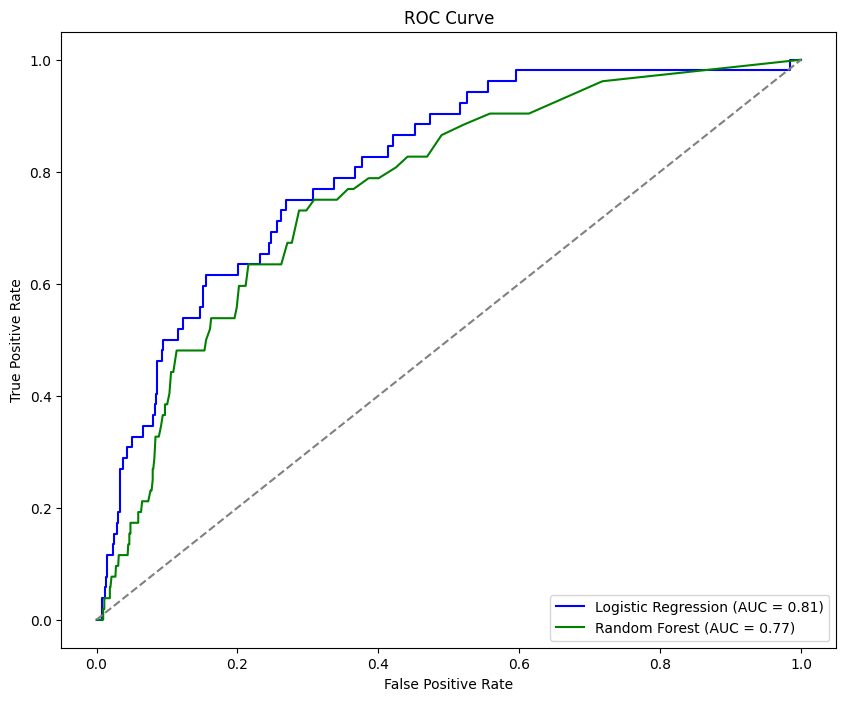

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Compute ROC curve for both models
fpr_logreg, tpr_logreg, _ = roc_curve(y_test, y_pred_logreg_prob)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf_prob)

# Plot ROC curve
plt.figure(figsize=(10, 8))

# Plot for Logistic Regression
plt.plot(fpr_logreg, tpr_logreg, label=f'Logistic Regression (AUC = {roc_auc_logreg:.2f})', color='blue')

# Plot for Random Forest
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.2f})', color='green')

# Plot diagonal line (Random Classifier)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')

# Labels and title
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')

# Show the plot
plt.show()


#Using GradientBoosting to see whether it improves the model or not

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, accuracy_score

# Hyperparameter grid for Gradient Boosting
param_dist_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize RandomizedSearchCV for Gradient Boosting
random_gb = RandomizedSearchCV(GradientBoostingClassifier(random_state=42), param_distributions=param_dist_gb, n_iter=100, cv=5, n_jobs=-1, scoring='accuracy', random_state=42)

# Fit the model
random_gb.fit(X_train_res, y_train_res)

# Best hyperparameters
print("Best hyperparameters for Gradient Boosting (RandomizedSearchCV):", random_gb.best_params_)

# Best model
best_gb_random = random_gb.best_estimator_

# Predict on test set
y_pred_gb_random = best_gb_random.predict(X_test)

# Evaluate the model
print("Gradient Boosting with Best Hyperparameters (RandomizedSearchCV):")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb_random)}")
print("Classification Report:")
print(classification_report(y_test, y_pred_gb_random))

Best hyperparameters for Gradient Boosting (RandomizedSearchCV): {'n_estimators': 200, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': 5, 'learning_rate': 0.2}
Gradient Boosting with Best Hyperparameters (RandomizedSearchCV):
Accuracy: 0.9339908952959028
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      1266
           1       0.14      0.13      0.14        52

    accuracy                           0.93      1318
   macro avg       0.55      0.55      0.55      1318
weighted avg       0.93      0.93      0.93      1318



#Interpretation
The Gradient Boosting model achieves a high overall accuracy of 93.4%, largely by correctly identifying non-stroke cases (precision 0.96, recall 0.97, F1-score 0.97), but it continues to struggle with the minority class—predicting strokes yields a precision of only 0.14, recall of 0.13, and F1-score of 0.14—indicating both a high false-alarm rate and many missed stroke cases; as a result, the weighted-average F1 of 0.93 is inflated by the dominant class performance while the macro-average F1 of 0.55 more truthfully reflects the model’s weak ability to detect actual strokes, underscoring the need for targeted imbalance treatments such as resampling, class-weight adjustments, or probability threshold tuning.


#Interpretation and Business Context
F1 Score:
F1 score is the harmonic mean of precision and recall. It is especially useful when you need to balance precision and recall, and it's particularly important in imbalanced datasets like your stroke prediction task.

High F1 Score: Indicates that your model is effectively balancing both false positives and false negatives. In a business context, this means that the model is both correctly identifying stroke cases and not falsely labeling too many non-stroke cases as strokes.

Low F1 Score: A low F1 score suggests that your model might be misclassifying a lot of stroke cases or non-stroke cases. This can be harmful in a healthcare setting, where you want to minimize missed stroke diagnoses (false negatives) and avoid unnecessary treatments for patients who do not have a stroke (false positives).

ROC-AUC:
The ROC-AUC (Area Under the Curve) evaluates the model's ability to distinguish between the classes (stroke vs. no stroke) across different thresholds.

High ROC-AUC: A high ROC-AUC indicates that your model is good at distinguishing between stroke and non-stroke patients. In business terms, this means your model is reliable in predicting stroke occurrences, which is crucial in healthcare decision-making, such as identifying patients who need immediate care.

Low ROC-AUC: A low ROC-AUC suggests that your model is unable to differentiate well between the two classes. In healthcare, this could mean that patients who need urgent care might be missed (false negatives), or unnecessary interventions might occur for non-stroke patients (false positives).

False Positives and True Negatives in Stroke Prediction:
False Positives: Predicting that a patient will have a stroke when they actually do not.

Business Impact: In healthcare, this could lead to unnecessary treatments, additional diagnostic tests, or patient anxiety, all of which increase costs and may affect patient trust.

True Negatives: Correctly predicting that a patient will not have a stroke.

Business Impact: True negatives are generally good as they mean the model is correctly identifying people who are not at risk of a stroke. However, it’s still important to look at false negatives, as missing out on stroke patients is critical.